In [32]:
import os
import json
import matplotlib.pyplot as plt
import re 

In [14]:
logs_dir = 'logs'

In [33]:
# Function to extract the desired metrics from a JSON file
def extract_metrics(json_file):
    metrics = {
        'acceptance_rate': None,
        'total_time': None,
        'time_per_token': None,
        'tokens_per_second': None
    }
    
    with open(json_file, 'r') as f:
        try:
            data = json.load(f)
            metrics['acceptance_rate'] = data.get('acceptance_rate', {}).get('mean')
            metrics['total_time'] = data.get('total_time', {}).get('mean')
            metrics['time_per_token'] = data.get('time_per_token', {}).get('mean')
            metrics['tokens_per_second'] = data.get('tokens_per_second', {}).get('mean')
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON in {json_file}: {e}")
            return None
    
    return metrics

def extract_number_from_subfolder_name(subfolder_name):
    match = re.search(r'(\d+)B$', subfolder_name)  # Extract the number before 'B'
    if match:
        return int(match.group(1))
    return float('inf')

    
# Function to plot the bar graphs for each subfolder
def plot_bar_graphs(metric_data):
    # Prepare the data for plotting
    for metric_name, data in metric_data.items():
        subfolders = list(data.keys())
        subfolders.sort(key=extract_number_from_subfolder_name)
        
        # Get the corresponding metric values for the sorted subfolders
        values = [data[subfolder] for subfolder in subfolders]
        
        plt.figure(figsize=(10, 6))
        plt.bar(subfolders, values, color='skyblue')
        plt.xlabel('Subfolder Name')
        plt.ylabel(metric_name)
        plt.title(f'{metric_name} across subfolders')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()



# Function to process all the .json files and extract the metrics
def process_logs(logs_dir):
    # Store the extracted data for plotting
    metric_data = {
        'acceptance_rate': {},
        'total_time': {},
        'time_per_token': {},
        'tokens_per_second': {}
    }

    # Walk through the logs directory
    for subdir, dirs, files in os.walk(logs_dir):
        eval_files = [file for file in files if file.endswith(".json") and file.startswith("eval_")]
        
        # If there are any eval files in the subdirectory, find the one with the largest first and second values
        if eval_files:
            eval_files.sort(key=lambda x: (int(x.split('_')[1]), int(x.split('_')[2].split('.')[0])), reverse=True)
            best_file = eval_files[0]

            # Extract the metrics from the best file
            json_file_path = os.path.join(subdir, best_file)
            metrics = extract_metrics(json_file_path)

            if metrics:
                subfolder_name = os.path.basename(subdir)  # Use the subfolder name as the key
                # Store the metrics for the subfolder
                for metric_name in metric_data:
                    if metrics.get(metric_name) is not None:
                        metric_data[metric_name][subfolder_name] = metrics[metric_name]

    # Plot the bar graphs for each metric
    plot_bar_graphs(metric_data)

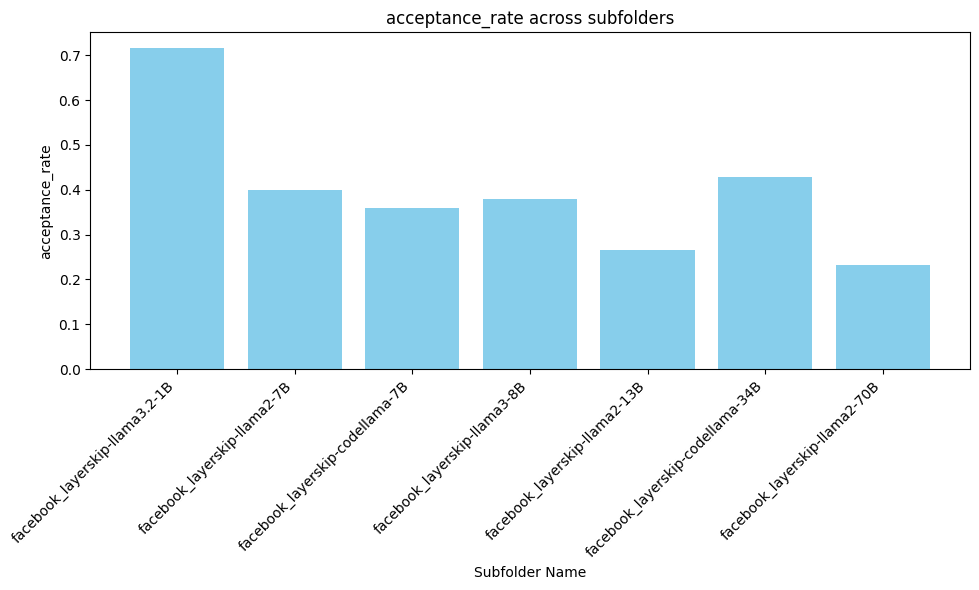

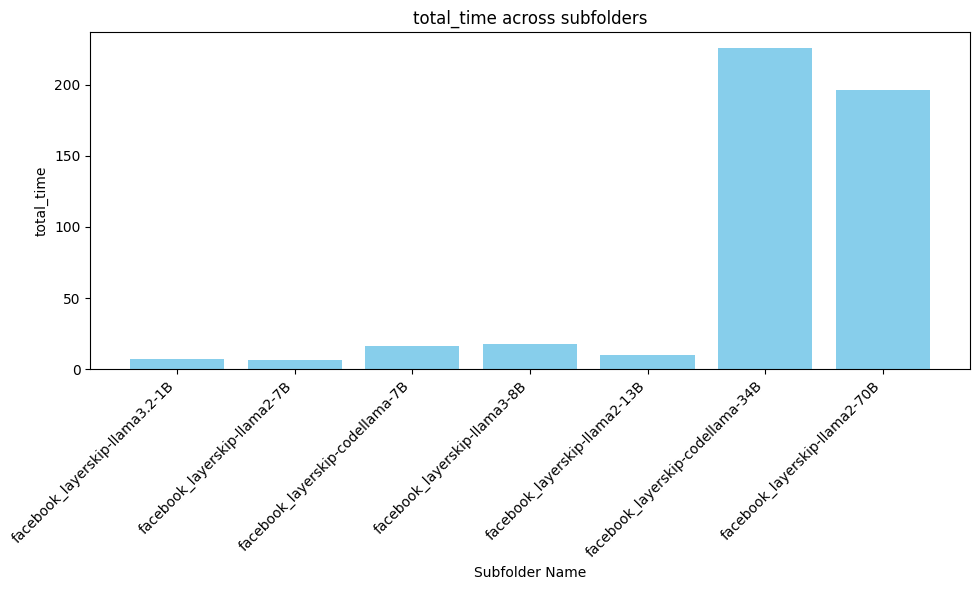

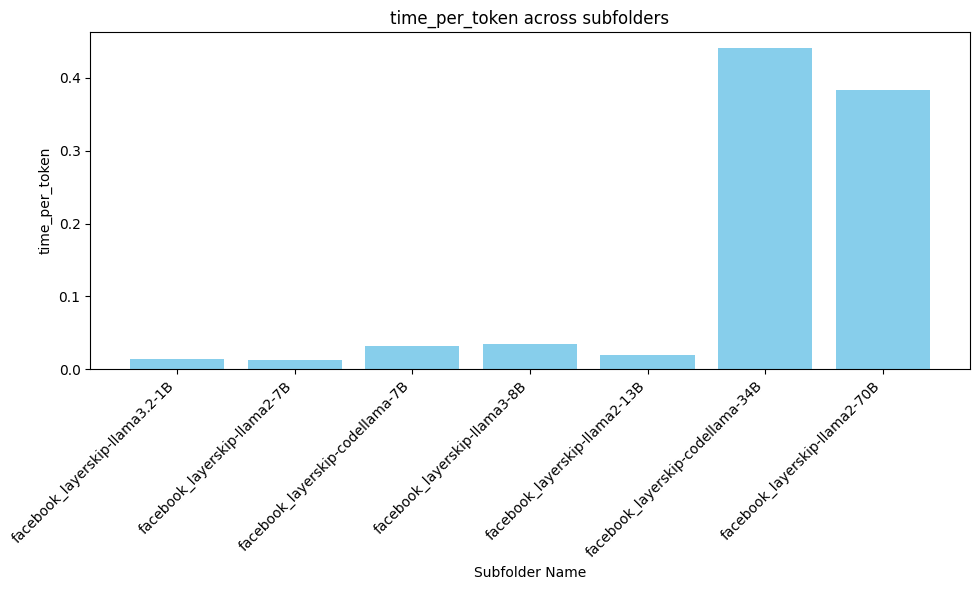

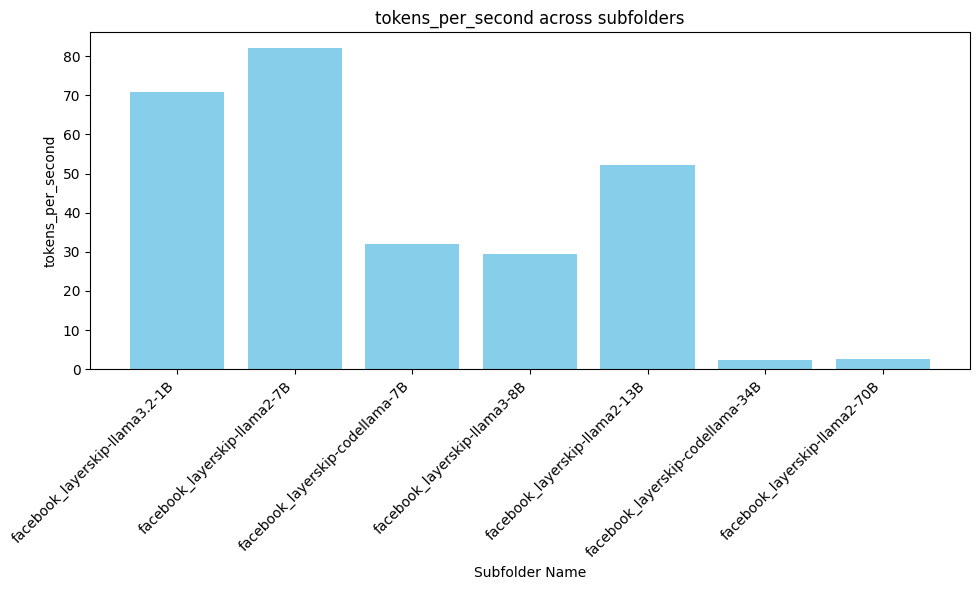

In [34]:
process_logs(logs_dir)